In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('Train.csv')

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56b4ba2358>,
      dtype=object)

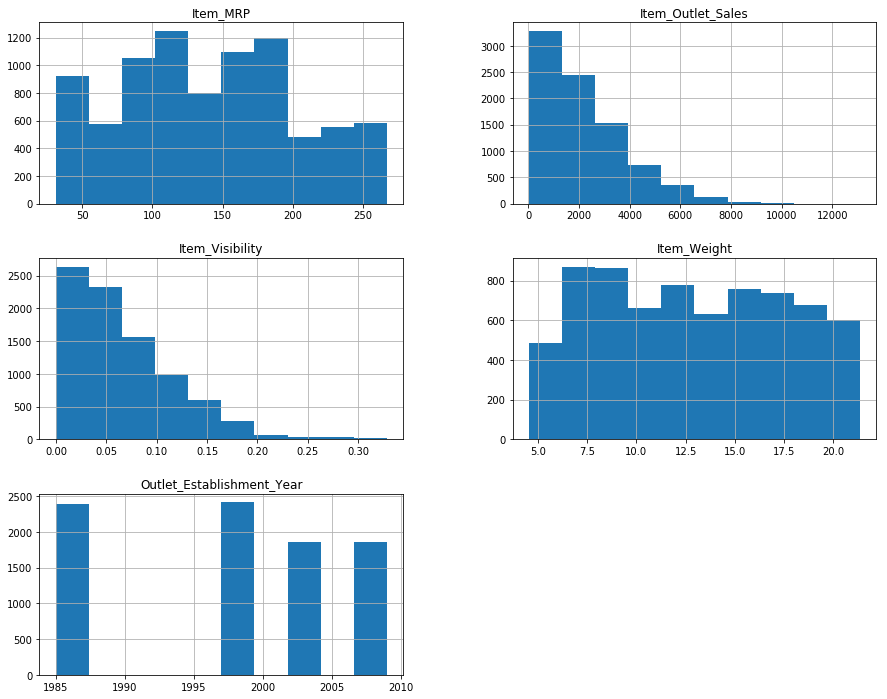

In [9]:
df.hist(figsize=(15,12))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [12]:
corr_matrix=df.corr()
corr_matrix['Item_Outlet_Sales']
#item_mrp has the highest value so it has a good correlation

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [13]:
df.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCQ06     9
FDW49     9
FDF56     9
DRE49     9
NCI54     9
FDX04     9
FDD38     9
FDU12     9
NCL31     9
NCB18     9
FDG09     9
NCF42     9
NCJ30     9
NCY18     9
FDV38     9
FDT07     9
FDV60     9
FDO19     9
FDQ40     9
DRN47     9
FDX31     9
FDW26     9
FDX20     9
FDP25     9
FDF52     9
FDT24     8
FDX45     8
NCL53     8
         ..
FDH22     2
FDI36     2
NCW30     2
DRG25     2
NCM42     2
FDU09     2
FDE38     2
FDU43     2
FDT33     2
DRL59     2
FDE39     2
NCX53     2
FDM16     2
FDW10     2
FDZ50     2
FDF38     2
FDD48     2
FDW58     2
FDR03     2
FDB47     2
DRC24     2
FDT35     1
FDN52     1
FDQ60     1
FDE52     1
FDO33     1
FDY43     1
FDC23     1
FDK57     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [14]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('LF','Low Fat')
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')

In [16]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [17]:
df.Item_Identifier=df.Item_Identifier.astype('category')
df.Item_Fat_Content=df.Item_Fat_Content.astype('category')
df.Item_Type=df.Item_Type.astype('category')
df.Outlet_Identifier=df.Outlet_Identifier.astype('category')
df.Outlet_Establishment_Year=df.Outlet_Establishment_Year.astype('int64')

df.Outlet_Type=df.Outlet_Type.astype('category')
df.Outlet_Location_Type=df.Outlet_Location_Type.astype('category')
df.Outlet_Size=df.Outlet_Size.astype('category')

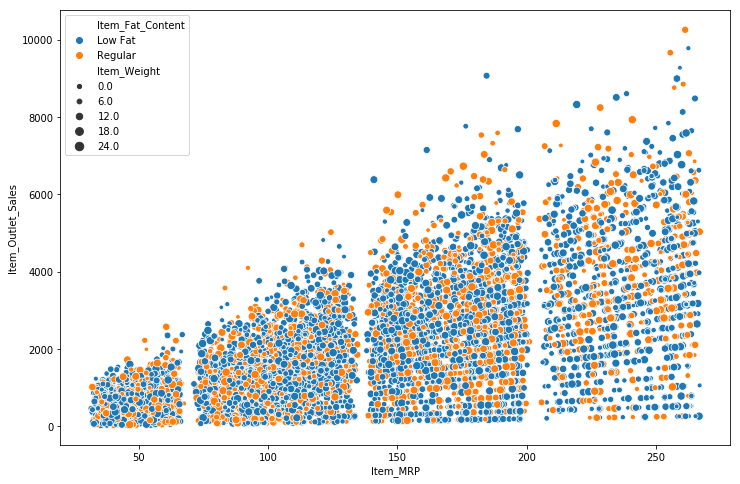

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content'
               ,size='Item_Weight',data=df)

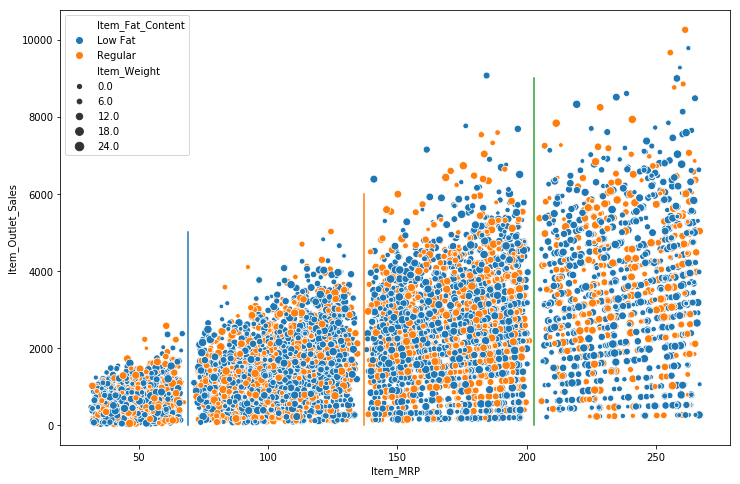

In [24]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content'
               ,size='Item_Weight',data=df)
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,6000])
plt.plot([203,203],[0,9000])

In [25]:
df.Item_MRP=pd.cut(df.Item_MRP,bins=[25,69,137,203,270],
                   labels=['a','b','c','d'],right=True)

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


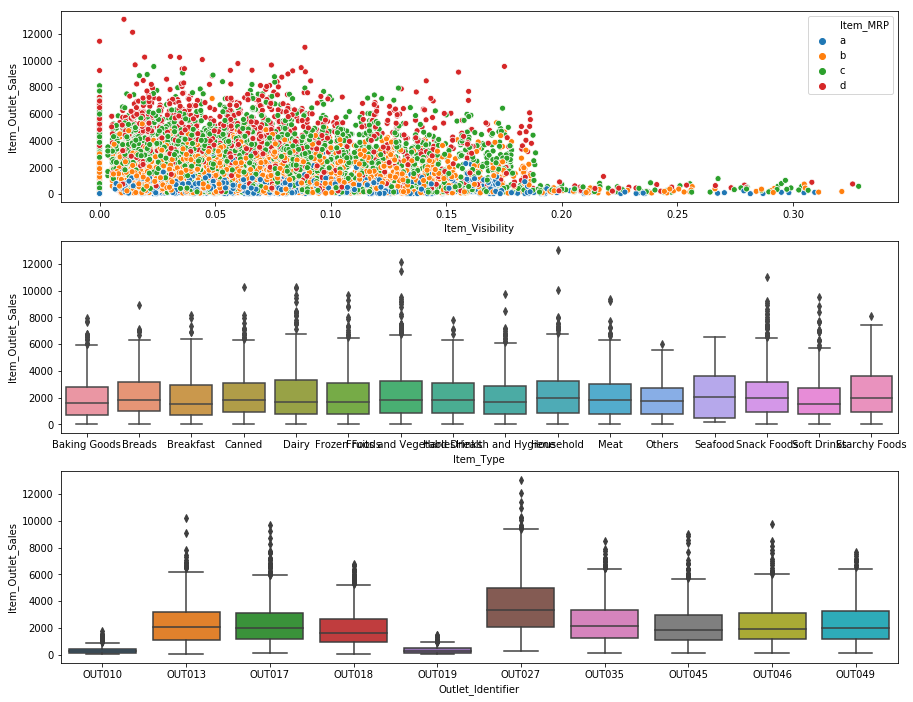

In [36]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',
                hue='Item_MRP',data=df,ax=axes[0])
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=df)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=df)

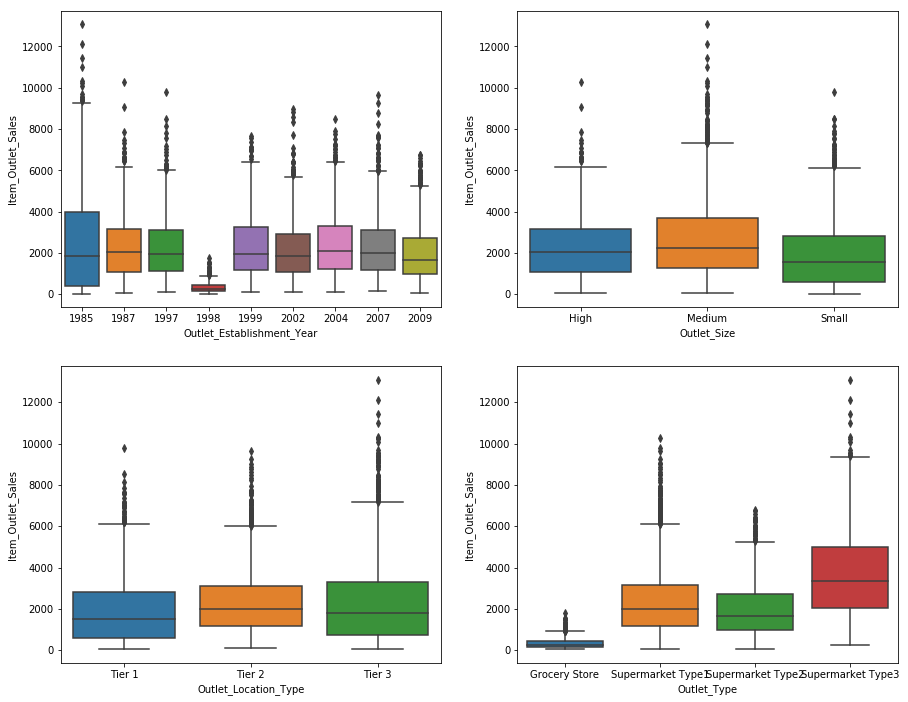

In [37]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=df)

In [40]:
attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size'
           ,'Outlet_Establishment_Year','Outlet_Identifier','Item_Type',
           'Item_Outlet_Sales']

In [41]:
data=df[attributes]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
Item_MRP                     8523 non-null category
Outlet_Type                  8523 non-null category
Outlet_Location_Type         8523 non-null category
Outlet_Size                  6113 non-null category
Outlet_Establishment_Year    8523 non-null int64
Outlet_Identifier            8523 non-null category
Item_Type                    8523 non-null category
Item_Outlet_Sales            8523 non-null float64
dtypes: category(6), float64(1), int64(1)
memory usage: 184.9 KB


In [63]:
data[data.Outlet_Size.isnull()]#.Outlet_Identifier.unique()

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
8,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Frozen Foods,1076.5986
9,c,Supermarket Type1,Tier 2,NaN,2007,OUT017,Frozen Foods,4710.5350
25,a,Supermarket Type1,Tier 2,NaN,2007,OUT017,Household,838.9080
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
30,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,163.7868
33,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Breads,2174.5028
45,c,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,358.2004
46,c,Supermarket Type1,Tier 2,NaN,2002,OUT045,Health and Hygiene,2428.8384
47,d,Supermarket Type1,Tier 2,NaN,2002,OUT045,Canned,5815.0972


In [82]:
data[data.Outlet_Size.isnull()].Outlet_Identifier.unique()
#type(d)
#d.groupby('Outlet_Size').Outlet_Identifier.value_counts()#.unique()

[OUT010, OUT045, OUT017]
Categories (3, object): [OUT010, OUT045, OUT017]

In [54]:
data.groupby('Outlet_Type').get_group('Grocery Store')['Outlet_Location_Type'].value_counts()

Tier 3    555
Tier 1    528
Tier 2      0
Name: Outlet_Location_Type, dtype: int64

In [52]:
data.groupby('Outlet_Type').get_group('Grocery Store')

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
23,b,Grocery Store,Tier 1,Small,1985,OUT019,Baking Goods,214.3876
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
29,a,Grocery Store,Tier 1,Small,1985,OUT019,Canned,125.8362
30,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,163.7868
45,c,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,358.2004
49,c,Grocery Store,Tier 1,Small,1985,OUT019,Dairy,780.3176
59,c,Grocery Store,Tier 1,Small,1985,OUT019,Canned,892.1720
63,a,Grocery Store,Tier 1,Small,1985,OUT019,Frozen Foods,147.8076
65,c,Grocery Store,Tier 3,NaN,1998,OUT010,Snack Foods,184.4266


In [55]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [56]:
(data.Outlet_Identifier=='OUT010').value_counts()

False    7968
True      555
Name: Outlet_Identifier, dtype: int64

In [57]:
data.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

In [83]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [84]:
data.Outlet_Size=data.apply(func,axis=1)

/home/kamoo/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [86]:
data[data.Outlet_Size.isnull()]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales


In [87]:
data.head()

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,d,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,a,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,c,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,c,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,a,1987,OUT013,Household,994.7052


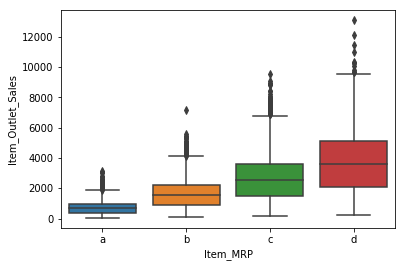

In [88]:
sns.boxplot(x='Item_MRP',y='Item_Outlet_Sales',data=data)

In [89]:
data[data.Item_MRP=='b'].Item_Outlet_Sales.max()

7158.6816

In [90]:
data[data.Item_Outlet_Sales==7158.6816]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
7737,d,Supermarket Type3,Tier 3,d,1985,OUT027,Breads,7158.6816
7796,b,Supermarket Type3,Tier 3,b,1985,OUT027,Household,7158.6816


In [91]:
data=data.drop(index=7796)

In [92]:
data[data.Item_MRP=='b'].Item_Outlet_Sales.max()

5582.733

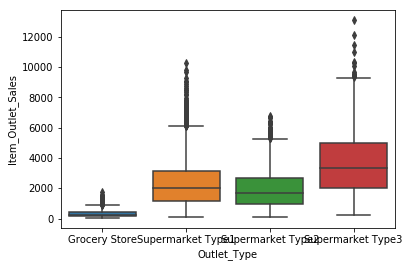

In [93]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)

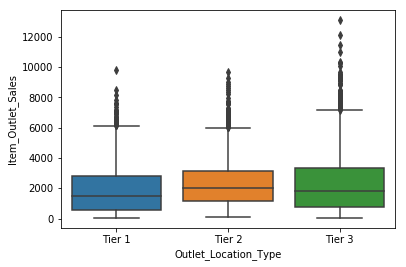

In [94]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)

In [95]:
data[data.Outlet_Location_Type=='Tier 1'].Item_Outlet_Sales.max()

9779.9362

In [96]:
data[data['Item_Outlet_Sales']==9779.9362]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
4289,d,Supermarket Type1,Tier 1,d,1997,OUT046,Health and Hygiene,9779.9362


In [97]:
data=data.drop(index=4289)

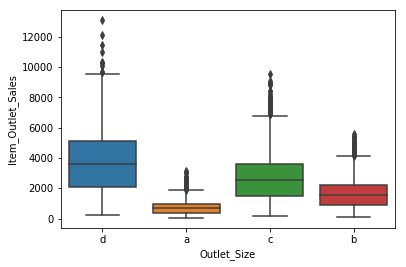

In [98]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data)

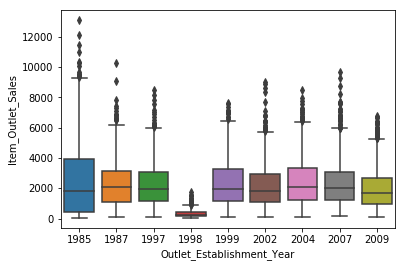

In [99]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data)

In [100]:
data.Outlet_Establishment_Year=data.Outlet_Establishment_Year.astype('category')

In [101]:
data

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,d,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,a,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,c,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,c,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,a,1987,OUT013,Household,994.7052
5,a,Supermarket Type2,Tier 3,a,2009,OUT018,Baking Goods,556.6088
6,a,Supermarket Type1,Tier 3,a,1987,OUT013,Snack Foods,343.5528
7,b,Supermarket Type3,Tier 3,b,1985,OUT027,Snack Foods,4022.7636
8,b,Supermarket Type1,Tier 2,b,2002,OUT045,Frozen Foods,1076.5986
9,c,Supermarket Type1,Tier 2,c,2007,OUT017,Frozen Foods,4710.5350


In [102]:
data_label=data.Item_Outlet_Sales
data_dummy=pd.get_dummies(data.iloc[:,0:6])

In [103]:
data_dummy.shape

(8521, 34)

In [104]:
data_dummy['Item_Outlet_Sales']=data_label
data_dummy.shape

(8521, 35)

In [105]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data_dummy,test_size=0.20,random_state=2019)
train.shape , test.shape


((6816, 35), (1705, 35))

In [106]:
train_label=train['Item_Outlet_Sales']
test_label=test['Item_Outlet_Sales']
del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

In [108]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train,train_label)
from sklearn.metrics import mean_squared_error
predict_lr=lr.predict(test)
mse=mean_squared_error(test_label,predict_lr)
lr_score=np.sqrt(mse)
lr_score

1169.710752938375